# Analyzing demographic variation among US counties using biplots

The data considered here are a single year of population counts for US counties.  The population within each county is partitioned into 2 x 2 x 4 x 19 = 304 demographic cells (sex ⨯ Hispanic ethnicity status ⨯ race ⨯ age).  See the prep.py script for more information.

In [1]:
import numpy as np
import pandas as pd
from prep import demog, births
import matplotlib.pyplot as plt

This is what the demographic data looks like in its initial form:

In [2]:
demog.head()

,W_N_M_0,W_N_M_1,W_N_M_2,W_N_M_3,W_N_M_4,W_N_M_5,W_N_M_6,W_N_M_7,W_N_M_8,W_N_M_9,...,A_H_M_19,N_H_M_18,N_H_F_19,A_H_M_16,N_H_M_17,N_H_M_19,N_H_F_18,A_H_F_18,A_H_F_19,B_H_M_19
FIPS,,,,,,,,,,,,,,,,,,,,,
01001,243.0,983.0,1409.0,1489.0,1498.0,1236.0,1290.0,1271.0,1330.0,1434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01003,913.0,3696.0,4943.0,5483.0,5138.0,4317.0,4529.0,4656.0,5057.0,5273.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01005,41.0,201.0,273.0,278.0,313.0,360.0,418.0,386.0,409.0,454.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01007,108.0,355.0,510.0,576.0,539.0,471.0,562.0,544.0,563.0,613.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01009,269.0,1136.0,1527.0,1590.0,1674.0,1436.0,1441.0,1361.0,1528.0,1566.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Make sure that we use only the counties for which we have natality data.

In [3]:
fips = np.asarray(births["FIPS"].unique())
demogx = demog.reindex(fips)
demogx.head()

,W_N_M_0,W_N_M_1,W_N_M_2,W_N_M_3,W_N_M_4,W_N_M_5,W_N_M_6,W_N_M_7,W_N_M_8,W_N_M_9,...,A_H_M_19,N_H_M_18,N_H_F_19,A_H_M_16,N_H_M_17,N_H_M_19,N_H_F_18,A_H_F_18,A_H_F_19,B_H_M_19
FIPS,,,,,,,,,,,,,,,,,,,,,
01003,913.0,3696.0,4943.0,5483.0,5138.0,4317.0,4529.0,4656.0,5057.0,5273.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01015,451.0,1721.0,2345.0,2602.0,2777.0,2537.0,2806.0,2469.0,2575.0,2533.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01055,437.0,1783.0,2328.0,2430.0,2482.0,2241.0,2369.0,2139.0,2259.0,2568.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
01073,1940.0,7746.0,9266.0,9208.0,9531.0,9637.0,11520.0,11424.0,10857.0,10115.0,...,0.0,3.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0
01081,598.0,2283.0,3059.0,3195.0,4948.0,8924.0,4157.0,3511.0,3175.0,2959.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Get the national population counts in each race ⨯ ethnicity ⨯ sex cell, aggregating over age groups.  This is a simplified summary, it is not used in any of the subsequent analyses.

In [4]:
demogy = demogx.copy()
demogy.columns = pd.MultiIndex.from_tuples([tuple(x.split("_")) for x in demogy.columns])
demogy = demogy.unstack()
demogy = demogy.reset_index()
demogy.columns = ["race", "ethnicity", "sex", "age", "FIPS", "pop"]
demogy.groupby(["race", "ethnicity", "sex"])["pop"].agg(np.sum)

/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_94846/4192299842.py:6: FutureWarning: The provided callable <function sum at 0x10574db20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  demogy.groupby(["race", "ethnicity", "sex"])["pop"].agg(np.sum)


race  ethnicity  sex
A     H          F        474894.0
                 M        477119.0
      N          F       9847321.0
                 M       9111979.0
B     H          F       1531713.0
                 M       1475123.0
      N          F      18870100.0
                 M      17077823.0
N     H          F        817341.0
                 M        871688.0
      N          F        769416.0
                 M        732678.0
W     H          F      23113774.0
                 M      23536846.0
      N          F      74359656.0
                 M      72572050.0
Name: pop, dtype: float64

The total number of people included in this dataset is given below.

In [5]:
demogy["pop"].sum()

255639521.0

Convert the demographic data to an array, also save the county totals for use below.

In [6]:
demogz = np.asarray(demogx)
totpop = demogz.sum(1)

Log the data to stabilize variance and symmetrize the data.

In [7]:
demogz = np.log(1 + demogz)
totpopx = np.log(1 + totpop)

Double center the data, save the mean parameters so that we can standardize passive variables below.

In [8]:
gm = demogz.mean()
demogz -= gm
totpopx -= gm
colmn = demogz.mean(0)
demogz -= colmn
totpopx -= totpopx.mean()
rowmn = demogz.mean(1)
demogz -= rowmn[:, None]

Factor the data matrix

In [9]:
u,s,vt = np.linalg.svd(demogz, 0)
v = vt.T

To understand how many dimensions are contributing variation, we can consider the singular values.  A plot of the raw singular values is not that informative:

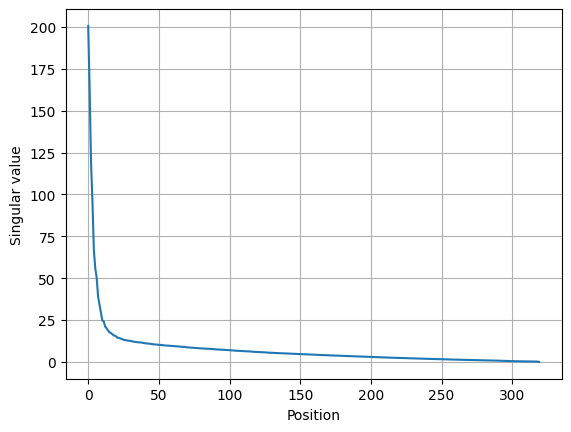

In [10]:
plt.clf()
plt.grid(True)
plt.plot(s)
plt.ylabel("Singular value")
plt.xlabel("Position")
plt.show()

Now we can consider some simple models for the singular values, including an exponential model $\lambda_i = a\exp(-bi)$ or a powerlaw model $\lambda_i = a/i^b$.  These models can be assessed by plotting the singular values in semi-log space or in log space, as shown below.  These plots suggest a "multiphasic" relationship which is not strictly speaking either exponential or powerlaw.  One interpretation is that there are 10-12 large singular values followed by an exponentially decreasing pattern of "tail singular values".

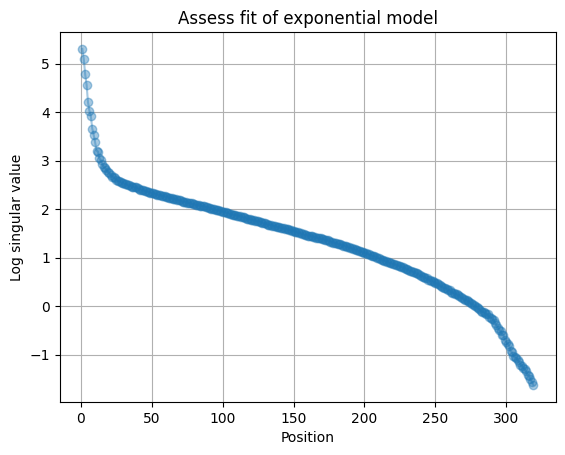

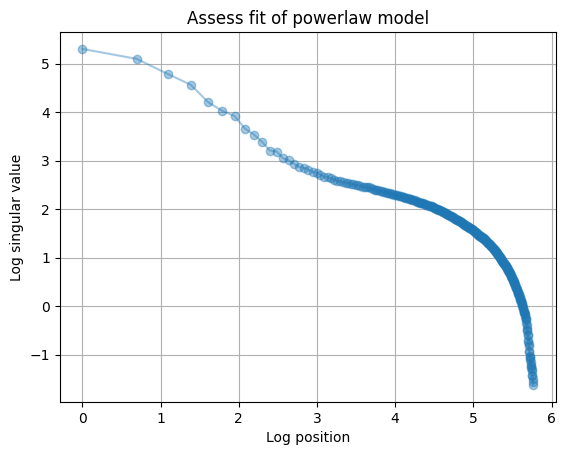

In [11]:
# Semi-log space plot
plt.clf()
plt.grid(True)
ii = np.arange(1, len(s) + 1)
plt.plot(ii[0:-1], np.log(s[0:-1]), "-o", alpha=0.4)
plt.xlabel("Position")
plt.ylabel("Log singular value")
plt.title("Assess fit of exponential model")
plt.show()

# Log space plot
plt.clf()
plt.grid(True)
ii = np.arange(1, len(s) + 1)
plt.plot(np.log(ii[0:-1]), np.log(s[0:-1]), "-o", alpha=0.4)
plt.xlabel("Log position")
plt.ylabel("Log singular value")
plt.title("Assess fit of powerlaw model")
plt.show()

For biplots, the singular values are partitioned between the left
and right singular vectors. alpha = 1 gives a distance
interpretation for rows (counties), alpha = 0 gives a distance
interpretation for columns (demographic categories), alpha = 0.5
does not have a strict distance interpretation.

In [12]:
alpha = 0.5
uu = np.dot(u, np.diag(s**alpha))
vv = np.dot(v, np.diag(s**(1-alpha)))

Specify some parameters for plotting.

In [13]:
colors = {"A": "purple", "B": "orange", "N": "lime", "W": "red"}
lt = {"F": "-", "M": ":"}
sym = {"H": "s", "N": "o"}
ages = range(0, 19)

In [14]:
def generate_biplot(uu, vv, sex, c, fips, j0=0, j1=1, highlight={}):
    """
    Produce a biplot of components 'j1' versus 'j0' (zero-based positions)
    based on the row scores in 'uu' and the column scores in vv.  The column 
    labels are in 'c' and the plot is given the title 'title'.  The dictionary
    'highlight' contains key/value pairs mapping FIPS codes to letters that
    are plotted to indicate the locations of specific counties.
    """

    # Map FIPS codes to row positions in the data
    fipsm = {v:i for i,v in enumerate(fips)}

    plt.clf()
    plt.figure(figsize=(10, 8))
    ax = plt.axes([0.1, 0.1, 0.76, 0.8])
    ax.grid(True)

    # Plot the counties as grey points
    plt.plot(uu[:, j0], uu[:, j1], 'o', color="grey", alpha=0.3)

    # Plot letters corresponding to the seletected counties.
    for k,v in highlight.items():
        jj = fipsm[k]   
        plt.text(uu[jj, j0], uu[jj, j1], v, color="blue", size=20)
    
    # Plot the demographic categories as colored points, joined
    # by lines connecting the age groups in order.
    for race in ["A", "B", "N", "W"]:
        for eth in ["H", "N"]:
            la = "%s_%s_%s" % (race, eth, sex)
            ii = [i for (i,x) in enumerate(c) if x.startswith(la)]
            sym = "-o" if eth == "H" else "-s"
            ax.plot(vv[ii, j0], vv[ii, j1], sym, color=colors[race], label=la, ms=5, mfc="none")
            ax.text(vv[ii[-1], j0], vv[ii[-1], j1], eth, ha="left", va="top", color=colors[race])

    # Plot the total population as a passive variable
    px = np.linalg.solve(np.diag(s), np.dot(uu.T, totpopx))
    pt = px[[j0, j1]]
    pt /= np.linalg.norm(pt)
    pt *= 1.5
    ax.annotate("Pop", xy=(0, 0), xytext=(pt[0], pt[1]), 
                arrowprops=dict(facecolor='black', arrowstyle="<-"))
            
    ax.set_xlabel("Component %d" % (j0+1), size=18)
    ax.set_ylabel("Component %d" % (j1+1), size=18)

    ha, lb = ax.get_legend_handles_labels()
    leg = plt.figlegend(ha, lb, loc="center right")
    leg.draw_frame(False)
    ax.set_title("Female" if sex == "F" else "Male")

    plt.show()

To reduce overplotting, produce separate biplots for females and for
males.

In [15]:
def make_biplots(j0, j1, highlight={}):
    c = demog.columns.to_list()
    for sex in ["F", "M"]:
        cx = [x.split("_") for x in c]
        ii = [i for (i,x) in enumerate(cx) if x[2] == sex]
        ii = np.asarray(ii, dtype=int)
        generate_biplot(uu, vv[ii, :], sex, [c[i] for i in ii], fips, j0=j0, j1=j1, highlight=highlight)

Annotate these counties in the biplots

In [16]:
highlight = {"26163": "W", # Wayne County MI
             "06085": "S", # Santa Clara CA
             "25005": "B", # Bristol MA
             "17031": "C", # Cook IL
             "46103": "P", # Pennington SD
             "06037": "L", # Los Angeles, CA
            }

<Figure size 640x480 with 0 Axes>

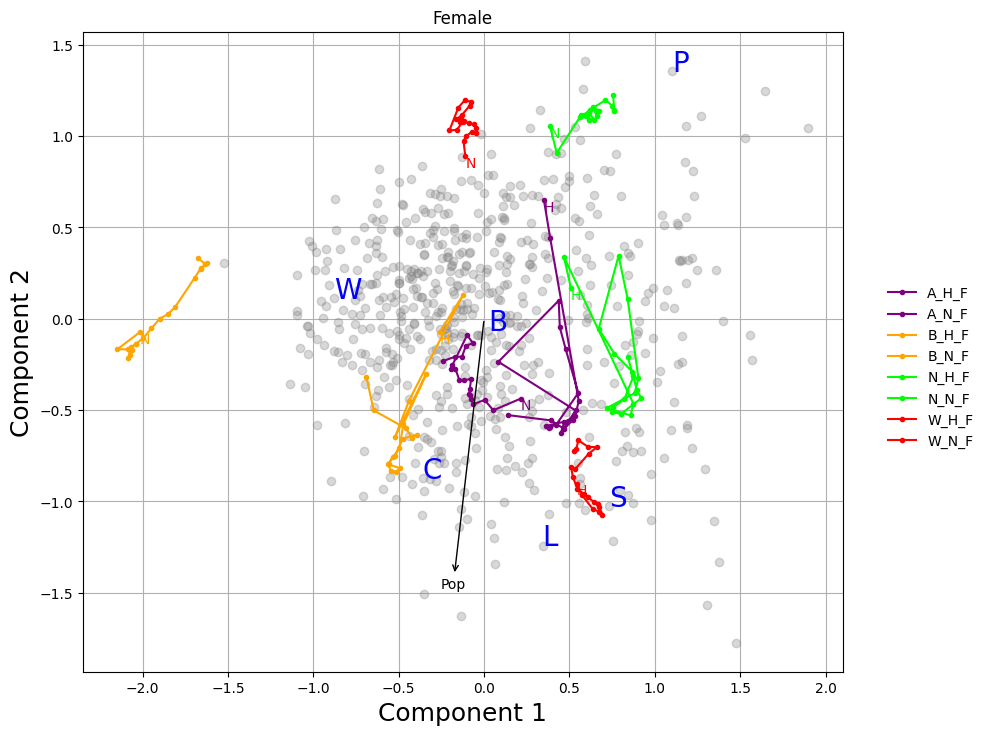

<Figure size 640x480 with 0 Axes>

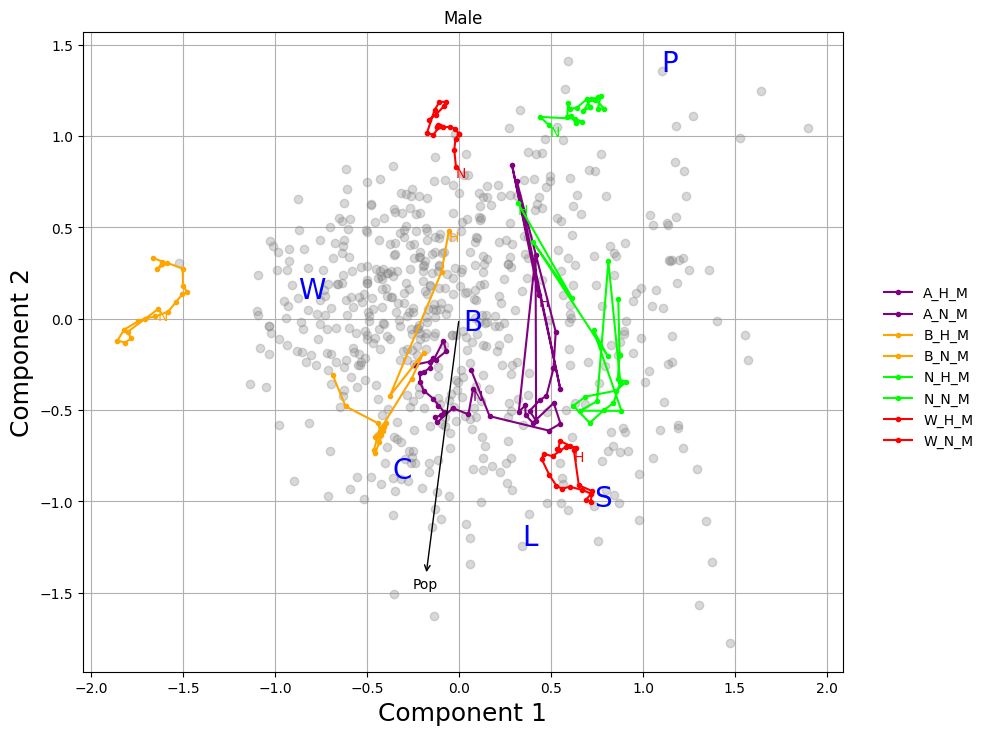

In [17]:
make_biplots(0, 1, highlight=highlight)

<Figure size 640x480 with 0 Axes>

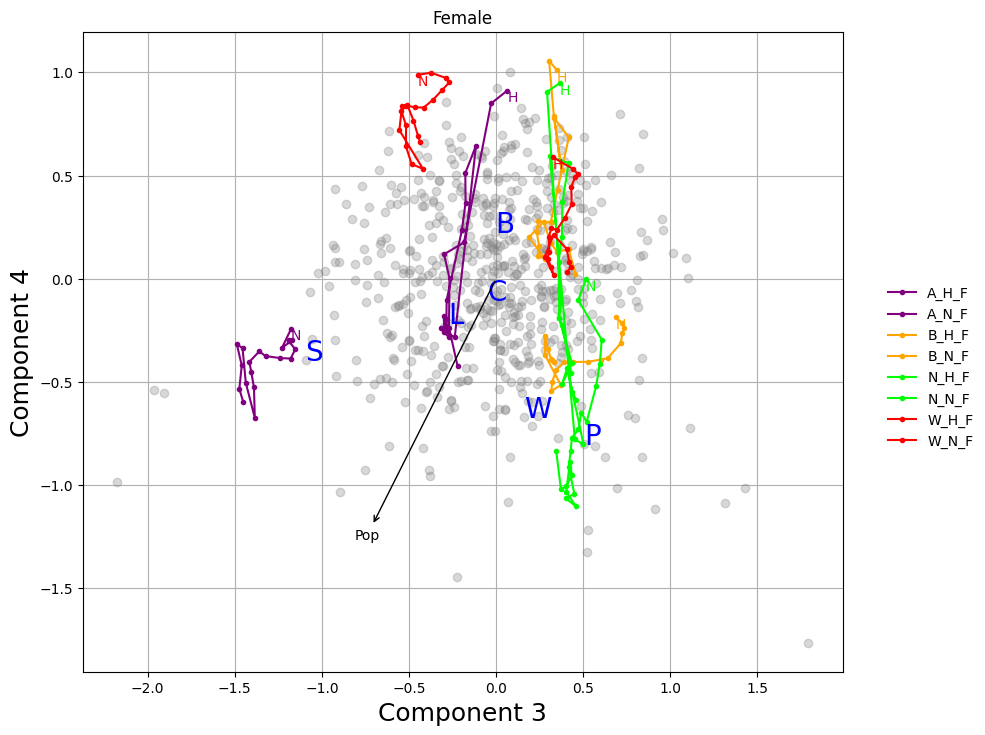

<Figure size 640x480 with 0 Axes>

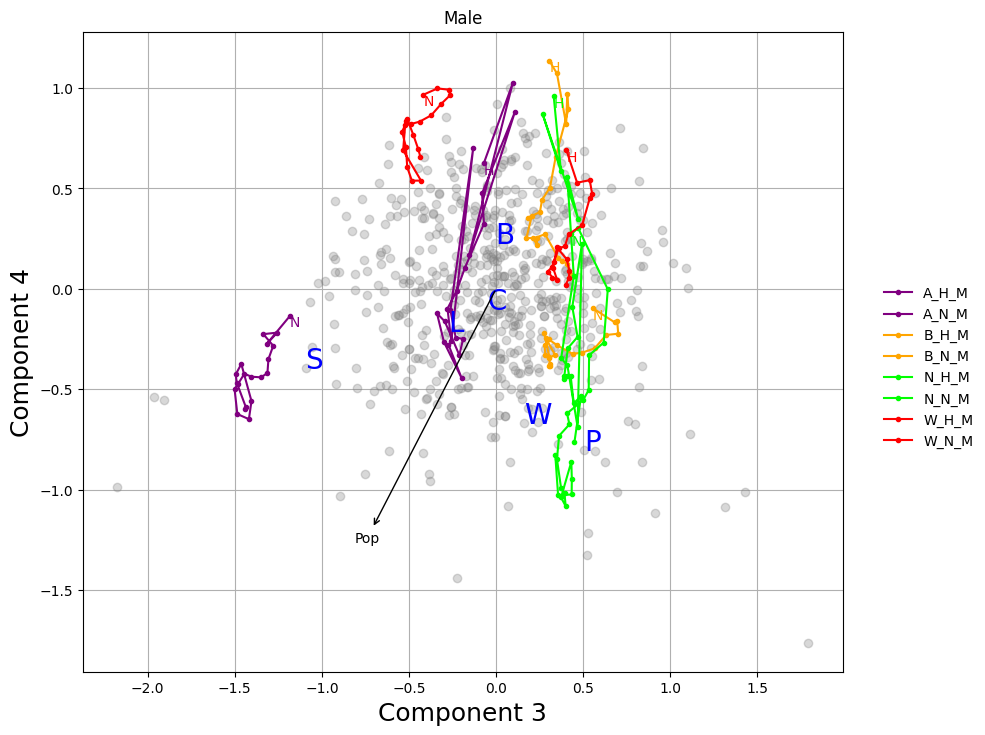

In [18]:
make_biplots(2, 3, highlight=highlight)